<a href="https://colab.research.google.com/github/0xflame-7/deepdata-archive/blob/main/ML_Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import userdata

In [2]:
KAGGLE_USERNAME = userdata.get("KAGGLE_USER")
KAGGLE_KEY = userdata.get("KAGGLE_TOKEN")

In [3]:
cred = {
    "username": KAGGLE_USERNAME,
    "key": KAGGLE_KEY
}

In [4]:
import os, json

os.makedirs(os.path.expanduser("~/.kaggle"), exist_ok=True)

In [5]:
with open(os.path.expanduser("~/.kaggle/kaggle.json"), "w") as f:
    json.dump(cred, f)

In [6]:
!chmod 600 /root/.kaggle/kaggle.json

In [7]:
!kaggle datasets download grouplens/movielens-20m-dataset --force

Dataset URL: https://www.kaggle.com/datasets/grouplens/movielens-20m-dataset
License(s): unknown
 95% 186M/195M [00:00<00:00, 784MB/s] 
100% 195M/195M [00:00<00:00, 799MB/s]


In [8]:
!unzip -o movielens-20m-dataset.zip
!rm movielens-20m-dataset.zip

Archive:  movielens-20m-dataset.zip
  inflating: genome_scores.csv       
  inflating: genome_tags.csv         
  inflating: link.csv                
  inflating: movie.csv               
  inflating: rating.csv              
  inflating: tag.csv                 


In [75]:
!nvidia-smi

Wed Nov  5 15:46:59 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   50C    P0             27W /   70W |     660MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

## Task 0

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [11]:
df_movies = pd.read_csv('/content/movie.csv')
df_ratings = pd.read_csv('/content/rating.csv')
df_tags = pd.read_csv('/content/tag.csv')
df_links = pd.read_csv('/content/link.csv')
df_genome_scores = pd.read_csv('/content/genome_scores.csv')
df_genome_tags = pd.read_csv('/content/genome_tags.csv')

# Select the first 10000 movies
df_movies_subset = df_movies.head(10000)
movie_ids_subset = df_movies_subset['movieId'].tolist()

# Filter the other dataframes to include only data for the selected movies
df_ratings = df_ratings[df_ratings['movieId'].isin(movie_ids_subset)]
df_tags = df_tags[df_tags['movieId'].isin(movie_ids_subset)]
df_links = df_links[df_links['movieId'].isin(movie_ids_subset)]
df_genome_scores = df_genome_scores[df_genome_scores['movieId'].isin(movie_ids_subset)]

df_movies = df_movies_subset

In [12]:
print("--- df_movies Information ---")
print(df_movies.head(4))
print(df_movies.shape)
print(df_movies.info())

print("\n--- df_ratings Information ---")
print(df_ratings.head(4))
print(df_ratings.shape)
print(df_ratings.info())

print("\n--- df_tags Information ---")
print(df_tags.head(4))
print(df_tags.shape)
print(df_tags.info())

print("\n--- df_links Information ---")
print(df_links.head(4))
print(df_links.shape)
print(df_links.info())

print("\n--- df_genome_scores Information ---")
print(df_genome_scores.head(4))
print(df_genome_scores.shape)
print(df_genome_scores.info())

print("\n--- df_genome_tags Information ---")
print(df_genome_tags.head(4))
print(df_genome_tags.shape)
print(df_genome_tags.info())

--- df_movies Information ---
   movieId                     title  \
0        1          Toy Story (1995)   
1        2            Jumanji (1995)   
2        3   Grumpier Old Men (1995)   
3        4  Waiting to Exhale (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
(10000, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  10000 non-null  int64 
 1   title    10000 non-null  object
 2   genres   10000 non-null  object
dtypes: int64(1), object(2)
memory usage: 234.5+ KB
None

--- df_ratings Information ---
   userId  movieId  rating            timestamp
0       1        2     3.5  2005-04-02 23:53:47
1       1       29     3.5  2005-04-

In [13]:
print(df_movies.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  10000 non-null  int64 
 1   title    10000 non-null  object
 2   genres   10000 non-null  object
dtypes: int64(1), object(2)
memory usage: 234.5+ KB
None


In [14]:
df_movies.movieId.nunique()

10000

In [15]:
df_ratings.head(4)

,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39
3,1,47,3.5,2005-04-02 23:32:07


In [16]:
df_ratings.rating.value_counts()

,count
rating,
4.0,5037244
3.0,3980476
5.0,2707402
3.5,1794935
2.0,1331858
4.5,1253739
2.5,735819
1.0,644011
1.5,237512


In [17]:
movies_not_in_ratings = df_movies[~df_movies['movieId'].isin(df_ratings['movieId'])]
print(f"Number of movies in df_movies not in df_ratings: {len(movies_not_in_ratings)}")
display(movies_not_in_ratings.head())

Number of movies in df_movies not in df_ratings: 6


,movieId,title,genres
8555,26018,Chase a Crooked Shadow (1958),Crime|Film-Noir|Mystery|Thriller
8933,26580,"Park Is Mine, The (1986)",Action|Drama|Thriller
9249,27249,"Trumpet of the Swan, The (2001)",Animation|Drama|Musical
9315,27396,"Gentleman's Game, A (2002)",Drama
9770,31797,White Banners (1938),Drama


In [18]:
# Number of ratings by movie release year
import re

def extract_year(title):
    match = re.search(r'\((\d{4})\)', title)
    if match:
        year = int(match.group(1))
        return year if 1900 <= year <= 2020 else None
    return None

In [19]:
df_movies['genres'] = df_movies['genres'].str.replace(r"\|?IMAX\|?", "", regex=True)
df_movies['genres'] = df_movies['genres'].replace("", "(no genres listed)")
df_movies['year'] = df_movies['title'].apply(extract_year)
df_movies.genres.replace("(no genres listed)", np.nan, inplace=True)

In [20]:
df_movies.loc[df_movies['year'].isna()].head(4)

,movieId,title,genres,year


In [21]:
print(df_movies.isna().sum())
df_movies.dropna(inplace=True)


movieId    0
title      0
genres     1
year       0
dtype: int64


In [22]:
df_movies = df_movies[df_movies['movieId'].isin(df_ratings['movieId'])].reset_index(drop=True)

In [23]:
df_movies.shape

(9993, 4)

### Visualize

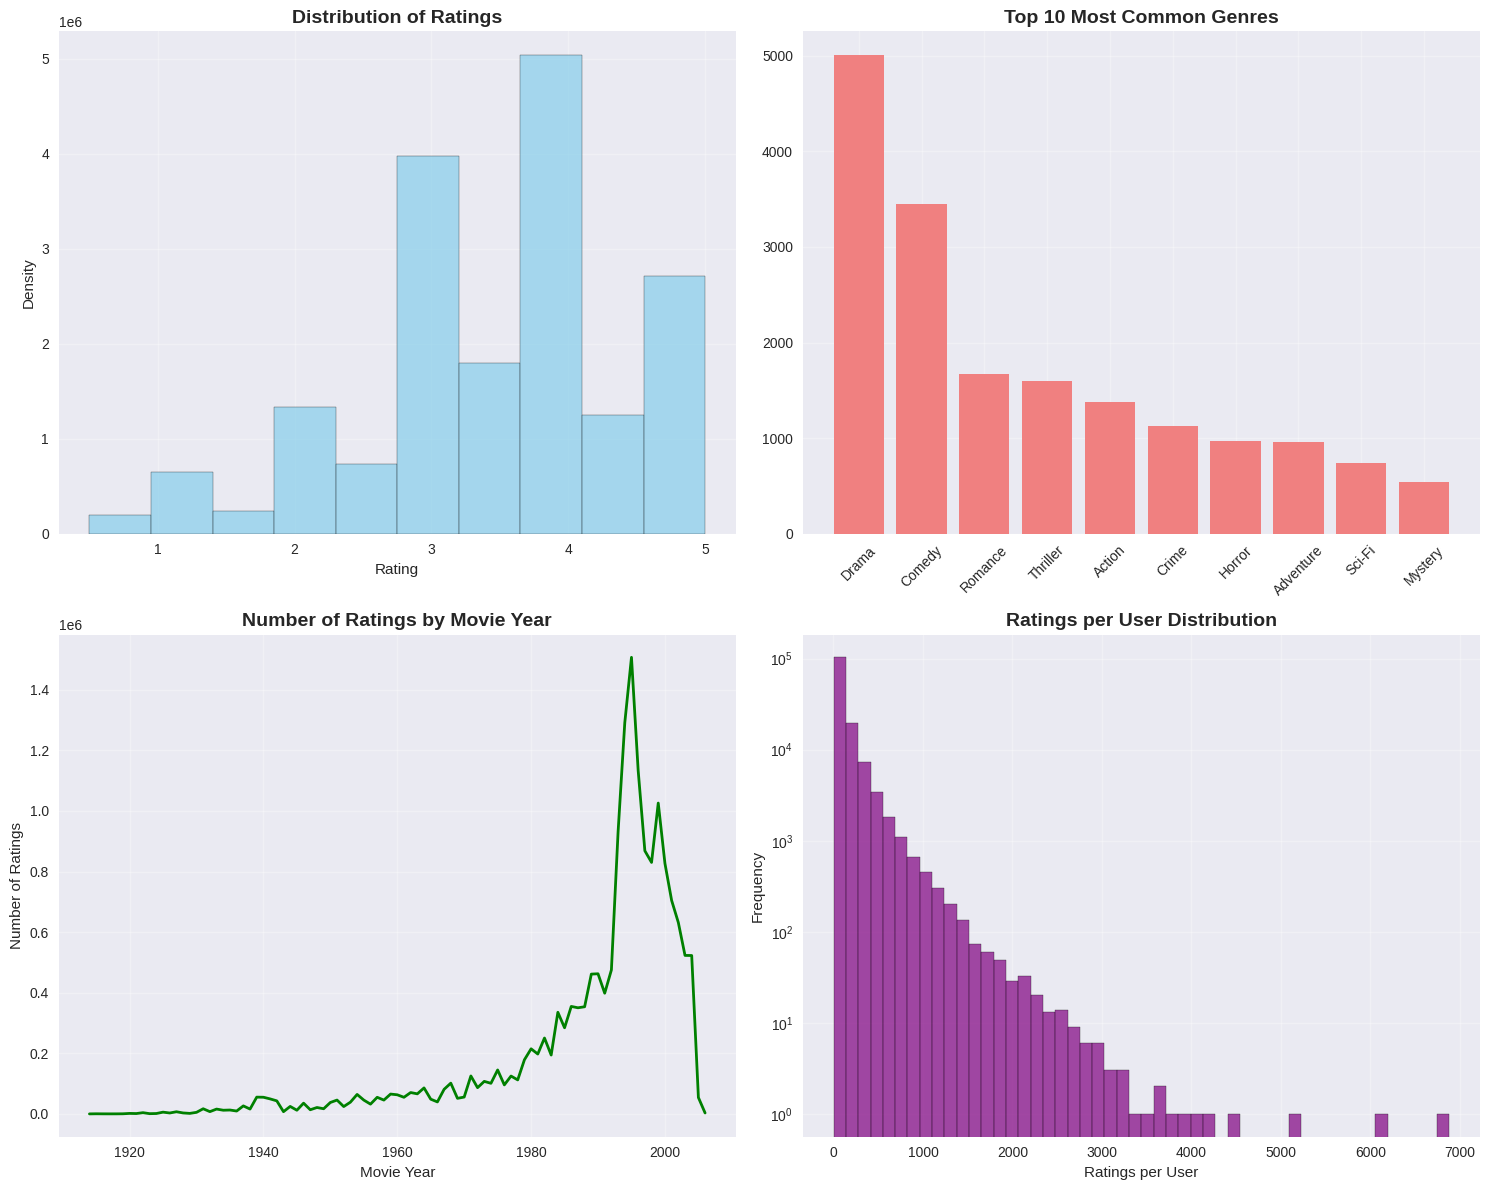

In [24]:
plt.style.use('seaborn-v0_8')
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

axes[0,0].hist(df_ratings['rating'], bins=10, alpha=0.7, color='skyblue', edgecolor='black')
axes[0,0].set_title('Distribution of Ratings', fontsize=14, fontweight='bold')
axes[0,0].set_xlabel('Rating')
axes[0,0].set_ylabel('Density')
axes[0,0].grid(True, alpha=0.3)

# Top 10 most common genres
all_genres = []
for genres in df_movies['genres'].str.split('|'):
    all_genres.extend(genres)

genre_counts = pd.Series(all_genres).value_counts().head(10)
axes[0,1].bar(genre_counts.index, genre_counts.values, color='lightcoral')
axes[0,1].set_title('Top 10 Most Common Genres', fontsize=14, fontweight='bold')
axes[0,1].tick_params(axis='x', rotation=45)
axes[0,1].grid(True, alpha=0.3)

movies_with_year = df_movies.dropna(subset=['year'])

# Merge with ratings
movies_ratings = df_ratings.merge(df_movies[['movieId', 'year']], on='movieId', how='left')
yearly_counts = movies_ratings.dropna(subset=['year']).groupby('year').size()

axes[1,0].plot(yearly_counts.index, yearly_counts.values, color='green', linewidth=2)
axes[1,0].set_title('Number of Ratings by Movie Year', fontsize=14, fontweight='bold')
axes[1,0].set_xlabel('Movie Year')
axes[1,0].set_ylabel('Number of Ratings')
axes[1,0].grid(True, alpha=0.3)

# Rating density per user
user_rating_counts = df_ratings['userId'].value_counts()
axes[1,1].hist(user_rating_counts.values, bins=50, alpha=0.7, color='purple', edgecolor='black')
axes[1,1].set_title('Ratings per User Distribution', fontsize=14, fontweight='bold')
axes[1,1].set_xlabel('Ratings per User')
axes[1,1].set_ylabel('Frequency')
axes[1,1].set_yscale('log')
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [25]:
# Top 10 most-rated movies
movie_rating_counts = df_ratings['movieId'].value_counts().head(10)
print("\nTop 10 Movies with Most Ratings:")
for i, (movie_id, count) in enumerate(movie_rating_counts.items(), 1):
    title = df_movies[df_movies['movieId'] == movie_id]['title'].iloc[0]
    print(f"{i}. {title} — {count:,} ratings")

# Top 10 highest-rated movies (min 1000 ratings)
print("\n Top 10 Highest Rated Movies (min 1000 ratings):")
movie_stats = df_ratings.groupby('movieId').agg({'rating': ['count', 'mean']}).round(3)
movie_stats.columns = ['rating_count', 'rating_mean']
movie_stats = movie_stats[movie_stats['rating_count'] >= 1000]
top_rated = movie_stats.nlargest(10, 'rating_mean')

for i, movie_id in enumerate(top_rated.index, 1):
    title = df_movies[df_movies['movieId'] == movie_id]['title'].iloc[0]
    mean_rating = top_rated.loc[movie_id, 'rating_mean']
    rating_count = top_rated.loc[movie_id, 'rating_count']
    print(f"{i}. {title} — ⭐ {mean_rating} ({rating_count:,} ratings)")



Top 10 Movies with Most Ratings:
1. Pulp Fiction (1994) — 67,310 ratings
2. Forrest Gump (1994) — 66,172 ratings
3. Shawshank Redemption, The (1994) — 63,366 ratings
4. Silence of the Lambs, The (1991) — 63,299 ratings
5. Jurassic Park (1993) — 59,715 ratings
6. Star Wars: Episode IV - A New Hope (1977) — 54,502 ratings
7. Braveheart (1995) — 53,769 ratings
8. Terminator 2: Judgment Day (1991) — 52,244 ratings
9. Matrix, The (1999) — 51,334 ratings
10. Schindler's List (1993) — 50,054 ratings

 Top 10 Highest Rated Movies (min 1000 ratings):
1. Shawshank Redemption, The (1994) — ⭐ 4.447 (63,366 ratings)
2. Godfather, The (1972) — ⭐ 4.365 (41,355 ratings)
3. Usual Suspects, The (1995) — ⭐ 4.334 (47,006 ratings)
4. Schindler's List (1993) — ⭐ 4.31 (50,054 ratings)
5. Godfather: Part II, The (1974) — ⭐ 4.276 (27,398 ratings)
6. Seven Samurai (Shichinin no samurai) (1954) — ⭐ 4.274 (11,611 ratings)
7. Rear Window (1954) — ⭐ 4.271 (17,449 ratings)
8. Band of Brothers (2001) — ⭐ 4.263 (4,30

1.	Identify top-rated movies in different genres.
2.	Implement collaborative filtering for personalized recommendations.
3.	Analyze user engagement based on ratings and reviews.
4.	Visualize popular genres and their trends over time.
5.	Compare the performance of collaborative and content-based methods.
6.	Evaluate the system using metrics like RMSE and MAE
7.	Provide insights into user preferences for genre-based suggestions.

### Identify top-rated movies in different genres.

In [26]:
movie_ratings = df_ratings.merge(df_movies, on='movieId')
movie_ratings.head(4)

,userId,movieId,rating,timestamp,title,genres,year
0,1,2,3.5,2005-04-02 23:53:47,Jumanji (1995),Adventure|Children|Fantasy,1995
1,1,29,3.5,2005-04-02 23:31:16,"City of Lost Children, The (Cité des enfants p...",Adventure|Drama|Fantasy|Mystery|Sci-Fi,1995
2,1,32,3.5,2005-04-02 23:33:39,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller,1995
3,1,47,3.5,2005-04-02 23:32:07,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,1995


In [27]:
movie_ratings.shape

(17923504, 7)

In [28]:
avg_ratings = movie_ratings.groupby(['movieId', 'title', 'genres'])['rating'].agg(['mean', 'count']).reset_index()
avg_ratings.rename(columns={'mean': 'avg_rating', 'count': 'num_ratings'}, inplace=True)

In [29]:
avg_ratings.head(4)

,movieId,title,genres,avg_rating,num_ratings
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.921240,49695
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.211977,22243
2,3,Grumpier Old Men (1995),Comedy|Romance,3.151040,12735
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.861393,2756


In [30]:
avg_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9993 entries, 0 to 9992
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   movieId      9993 non-null   int64  
 1   title        9993 non-null   object 
 2   genres       9993 non-null   object 
 3   avg_rating   9993 non-null   float64
 4   num_ratings  9993 non-null   int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 390.5+ KB


In [31]:
filtered_movies = avg_ratings[avg_ratings['num_ratings'] >= 50]
filtered_movies.shape

(7596, 5)

In [32]:
filtered_movies['genres'] = filtered_movies['genres'].str.split('|')
exploded = filtered_movies.explode('genres')

In [33]:
exploded.shape

(16002, 5)

In [34]:
top_movies_by_genre = exploded.sort_values(['genres', 'avg_rating', 'num_ratings'], ascending=[True, False, False])
top_movies_by_genre.head(10)

,movieId,title,genres,avg_rating,num_ratings
1935,2019,Seven Samurai (Shichinin no samurai) (1954),Action,4.274180,11611
7355,7502,Band of Brothers (2001),Action,4.263182,4305
5916,6016,City of God (Cidade de Deus) (2002),Action,4.235410,12937
891,908,North by Northwest (1959),Action,4.233538,15627
2873,2959,Fight Club (1999),Action,4.227123,40106
1173,1198,Raiders of the Lost Ark (Indiana Jones and the...,Action,4.219009,43295
2943,3030,Yojimbo (1961),Action,4.211717,3559
257,260,Star Wars: Episode IV - A New Hope (1977),Action,4.190672,54502
1171,1196,Star Wars: Episode V - The Empire Strikes Back...,Action,4.188202,45313
2486,2571,"Matrix, The (1999)",Action,4.187186,51334


In [35]:
def get_movies_by_genre(df):
    # Group by genre and aggregate movie titles into a list
    genre_movies = df.groupby('genres')['title'].apply(list).reset_index()
    # Explode the list of titles to have each movie on a new row
    genre_movies_exploded = genre_movies.explode('title')
    # Pivot the table to have genres as columns and movie titles as values
    genre_movie_list = (genre_movies_exploded
                        .pivot_table(index=genre_movies_exploded.groupby('genres')
                        .cumcount(), columns='genres', values='title', aggfunc='first'))
    return genre_movie_list

genre_movie_list = get_movies_by_genre(top_movies_by_genre)

In [36]:
genre_movie_list.head(5)

genres,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,Seven Samurai (Shichinin no samurai) (1954),Seven Samurai (Shichinin no samurai) (1954),Spirited Away (Sen to Chihiro no kamikakushi) ...,Wallace & Gromit: The Wrong Trousers (1993),Dr. Strangelove or: How I Learned to Stop Worr...,"Shawshank Redemption, The (1994)",When We Were Kings (1996),"Shawshank Redemption, The (1994)",Spirited Away (Sen to Chihiro no kamikakushi) ...,Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),"Silence of the Lambs, The (1991)",Duck Soup (1933),"Usual Suspects, The (1995)",Casablanca (1942),Star Wars: Episode IV - A New Hope (1977),"Usual Suspects, The (1995)",Schindler's List (1993),"Treasure of the Sierra Madre, The (1948)"
1,Band of Brothers (2001),City of God (Cidade de Deus) (2002),Wallace & Gromit: The Wrong Trousers (1993),Wallace & Gromit: A Close Shave (1995),"Amelie (Fabuleux destin d'Amélie Poulain, Le) ...","Godfather, The (1972)","Thin Blue Line, The (1988)","Godfather, The (1972)","Princess Bride, The (1987)","Third Man, The (1949)",Psycho (1960),Stop Making Sense (1984),Rear Window (1954),Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),Star Wars: Episode V - The Empire Strikes Back...,Rear Window (1954),Band of Brothers (2001),Once Upon a Time in the West (C'era una volta ...
2,City of God (Cidade de Deus) (2002),North by Northwest (1959),Wallace & Gromit: A Close Shave (1995),My Neighbor Totoro (Tonari no Totoro) (1988),"Thin Man, The (1934)","Usual Suspects, The (1995)",Stop Making Sense (1984),Schindler's List (1993),Monty Python and the Holy Grail (1975),Double Indemnity (1944),"Sixth Sense, The (1999)",Singin' in the Rain (1952),"Third Man, The (1949)",North by Northwest (1959),"Matrix, The (1999)","Third Man, The (1949)",Dr. Strangelove or: How I Learned to Stop Worr...,"Good, the Bad and the Ugly, The (Buono, il bru..."
3,North by Northwest (1959),Raiders of the Lost Ark (Indiana Jones and the...,My Neighbor Totoro (Tonari no Totoro) (1988),"Grand Day Out with Wallace and Gromit, A (1989)",Wallace & Gromit: The Wrong Trousers (1993),"Godfather: Part II, The (1974)",Fog of War: Eleven Lessons from the Life of Ro...,"Godfather: Part II, The (1974)",My Neighbor Totoro (Tonari no Totoro) (1988),"Big Sleep, The (1946)",Alien (1979),Top Hat (1935),North by Northwest (1959),Notorious (1946),Blade Runner (1982),City of God (Cidade de Deus) (2002),Paths of Glory (1957),High Noon (1952)
4,Fight Club (1999),Yojimbo (1961),Creature Comforts (1989),Laputa: Castle in the Sky (Tenkû no shiro Rapy...,"Princess Bride, The (1987)",City of God (Cidade de Deus) (2002),Paradise Lost: The Child Murders at Robin Hood...,Seven Samurai (Shichinin no samurai) (1954),"Lord of the Rings: The Return of the King, The...",Chinatown (1974),"Shining, The (1980)","Night at the Opera, A (1935)","Big Sleep, The (1946)","Amelie (Fabuleux destin d'Amélie Poulain, Le) ...",Eternal Sunshine of the Spotless Mind (2004),North by Northwest (1959),Life Is Beautiful (La Vita è bella) (1997),Lone Star (1996)


### Building a system that recommends movies via content-based filtering techniques.

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [38]:
df_genome = pd.merge(df_genome_scores, df_genome_tags, on='tagId')

In [39]:
df_genome = df_genome[df_genome['relevance'] >= 0.7]

In [40]:
df_genome.head(4)

,movieId,tagId,relevance,tag
28,1,29,0.89200,adventure
62,1,63,0.93325,animated
63,1,64,0.98575,animation
185,1,186,0.95650,cartoon


In [41]:
df_genome_tags_text = df_genome.groupby('movieId')['tag'].apply(lambda x: " ".join(x)).reset_index()
df_genome_tags_text.columns = ['movieId', 'genome_tags']
df_genome_tags_text.head(4)

,movieId,genome_tags
0,1,adventure animated animation cartoon cgi child...
1,2,adventure animals big budget childhood childre...
2,3,comedy good sequel original sequel sequels
3,4,chick flick girlie movie romantic unlikely fri...


In [42]:
# Clear movie tags
df_tags.dropna(subset=['tag'], inplace=True)

In [43]:
# Group all user tags for each movie
df_movie_tags = df_tags.groupby('movieId')['tag'].apply(lambda x: " ".join(x)).reset_index()
df_movie_tags.columns = ['movieId', 'user_tags']
df_movie_tags.head(4)

,movieId,user_tags
0,1,Watched computer animation Disney animated fea...
1,2,time travel adapted from:book board game child...
2,3,old people that is actually funny sequel fever...
3,4,chick flick revenge characters chick flick cha...


In [44]:
# Merge movies + user tags
df_movies_merged = pd.merge(df_movies, df_movie_tags, on='movieId', how='left')
df_movies_merged['user_tags'] = df_movies_merged['user_tags'].fillna('')
df_movies_merged.head(4)

,movieId,title,genres,year,user_tags
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,Watched computer animation Disney animated fea...
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995,time travel adapted from:book board game child...
2,3,Grumpier Old Men (1995),Comedy|Romance,1995,old people that is actually funny sequel fever...
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995,chick flick revenge characters chick flick cha...


In [45]:
# Clean genres: replace "|" with spaces
df_movies_merged['genres'] = df_movies_merged['genres'].apply(lambda x: x.replace('|', ' '))

In [46]:
df_movies_merged = pd.merge(df_movies_merged, df_genome_tags_text, on='movieId', how='left')
df_movies_merged['genome_tags'] = df_movies_merged['genome_tags'].fillna('')
df_movies_merged.head(4)

,movieId,title,genres,year,user_tags,genome_tags
0,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy,1995,Watched computer animation Disney animated fea...,adventure animated animation cartoon cgi child...
1,2,Jumanji (1995),Adventure Children Fantasy,1995,time travel adapted from:book board game child...,adventure animals big budget childhood childre...
2,3,Grumpier Old Men (1995),Comedy Romance,1995,old people that is actually funny sequel fever...,comedy good sequel original sequel sequels
3,4,Waiting to Exhale (1995),Comedy Drama Romance,1995,chick flick revenge characters chick flick cha...,chick flick girlie movie romantic unlikely fri...


In [47]:
df_movies_merged['combined_text'] = (
    df_movies_merged['genres'] + " " +
    df_movies_merged['user_tags'] + " " +
    df_movies_merged['genome_tags']
)
df_movies_merged.head(4)

,movieId,title,genres,year,user_tags,genome_tags,combined_text
0,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy,1995,Watched computer animation Disney animated fea...,adventure animated animation cartoon cgi child...,Adventure Animation Children Comedy Fantasy Wa...
1,2,Jumanji (1995),Adventure Children Fantasy,1995,time travel adapted from:book board game child...,adventure animals big budget childhood childre...,Adventure Children Fantasy time travel adapted...
2,3,Grumpier Old Men (1995),Comedy Romance,1995,old people that is actually funny sequel fever...,comedy good sequel original sequel sequels,Comedy Romance old people that is actually fun...
3,4,Waiting to Exhale (1995),Comedy Drama Romance,1995,chick flick revenge characters chick flick cha...,chick flick girlie movie romantic unlikely fri...,Comedy Drama Romance chick flick revenge chara...


In [48]:
tfidf = TfidfVectorizer(stop_words='english', max_features=10000)
tfidf_matrix = tfidf.fit_transform(df_movies_merged['combined_text'])

print(f"TF-IDF Matrix shape: {tfidf_matrix.shape}")

TF-IDF Matrix shape: (9993, 10000)


In [49]:
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [50]:
indices = pd.Series(df_movies_merged.index, index=df_movies_merged['title']).drop_duplicates()

In [51]:
def recommend_movies_weighted(title, top_n=10):
    if title not in indices:
        return f"Movie '{title}' not found."
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:top_n*3]  # wider pool
    movie_indices = [i[0] for i in sim_scores]

    similar_movies = df_movies_merged.iloc[movie_indices][['movieId','title']]
    similar_movies = similar_movies.head(top_n)
    return similar_movies.reset_index(drop=True)

In [52]:
display(recommend_movies_weighted("Toy Story (1995)", top_n=10))

,movieId,title
0,3114,Toy Story 2 (1999)
1,2355,"Bug's Life, A (1998)"
2,4886,"Monsters, Inc. (2001)"
3,5218,Ice Age (2002)
4,6377,Finding Nemo (2003)
5,8961,"Incredibles, The (2004)"
6,5444,Lilo & Stitch (2002)
7,2294,Antz (1998)
8,4306,Shrek (2001)
9,596,Pinocchio (1940)


### Implement collaborative filtering for personalized recommendations.

In [65]:
import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from tqdm.auto import tqdm
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [54]:
print("CUDA available:", torch.cuda.is_available())
print("Current device:", torch.cuda.current_device())
print("Device name:", torch.cuda.get_device_name(0))

CUDA available: True
Current device: 0
Device name: Tesla T4


In [55]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print("Using device:", device)

Using device: cuda


In [56]:
# Encode indices
user2idx = {u: i for i, u in enumerate(df_ratings['userId'].unique())}
movie2idx = {m: i for i, m in enumerate(df_ratings['movieId'].unique())}
df_ratings['user_idx'] = df_ratings['userId'].map(user2idx)
df_ratings['movie_idx'] = df_ratings['movieId'].map(movie2idx)
n_users, n_movies = len(user2idx), len(movie2idx)

print(f"Users: {n_users}, Movies: {n_movies}")

Users: 138488, Movies: 9994


In [57]:
class MovieLensDataset(torch.utils.data.Dataset):
    def __init__(self, df, device):
        self.users = torch.tensor(df['user_idx'].values, dtype=torch.long, device=device)
        self.movies = torch.tensor(df['movie_idx'].values, dtype=torch.long, device=device)
        self.ratings = torch.tensor(df['rating'].values, dtype=torch.float32, device=device)

    def __len__(self):
        return len(self.ratings)

    def __getitem__(self, idx):
        return self.users[idx], self.movies[idx], self.ratings[idx]

train_df, test_df = train_test_split(df_ratings, test_size=0.2, random_state=42)
train_ds = MovieLensDataset(train_df, device)
test_ds = MovieLensDataset(test_df, device)

train_dl = DataLoader(train_ds, batch_size=8192, shuffle=True)
test_dl = DataLoader(test_ds, batch_size=8192)

In [58]:
class MatrixFactorization(nn.Module):
    def __init__(self, n_users, n_items, n_factors=64):
        super().__init__()
        self.user_emb = nn.Embedding(n_users, n_factors)
        self.item_emb = nn.Embedding(n_items, n_factors)
        self.user_bias = nn.Embedding(n_users, 1)
        self.item_bias = nn.Embedding(n_items, 1)
    def forward(self, u, i):
        dot = (self.user_emb(u) * self.item_emb(i)).sum(1)
        return dot + self.user_bias(u).squeeze() + self.item_bias(i).squeeze()

In [59]:
model = MatrixFactorization(n_users, n_movies).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
criterion = nn.MSELoss()

In [60]:
for epoch in range(5):
    model.train()
    total_loss = 0
    for users, movies, ratings in tqdm(train_dl, desc=f"Epoch {epoch+1}/5"):
        optimizer.zero_grad()
        preds = model(users, movies)
        loss = criterion(preds, ratings)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        if epoch == 0 and total_loss == 0:
            print("Sample tensor device:", users.device)

    print(f"Epoch {epoch+1}: Loss {total_loss/len(train_dl):.4f}")

Epoch 1/5:   0%|          | 0/1751 [00:00<?, ?it/s]

Epoch 1: Loss 54.0098


Epoch 2/5:   0%|          | 0/1751 [00:00<?, ?it/s]

Epoch 2: Loss 22.9319


Epoch 3/5:   0%|          | 0/1751 [00:00<?, ?it/s]

Epoch 3: Loss 10.4476


Epoch 4/5:   0%|          | 0/1751 [00:00<?, ?it/s]

Epoch 4: Loss 5.3825


Epoch 5/5:   0%|          | 0/1751 [00:00<?, ?it/s]

Epoch 5: Loss 3.1962


In [61]:
print("Model device:", next(model.parameters()).device)

Model device: cuda:0


In [62]:
print(torch.cuda.is_available())

True


In [63]:
next(model.parameters()).device

device(type='cuda', index=0)

In [66]:
model.eval()
y_true, y_pred = [], []
with torch.no_grad():
    for users, movies, ratings in test_dl:
        users, movies = users.to(device), movies.to(device)
        preds = model(users, movies).cpu().numpy()
        y_pred.extend(preds)
        y_true.extend(ratings.cpu().numpy())

rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mae = mean_absolute_error(y_true, y_pred)
print(f"PyTorch CF RMSE: {rmse:.4f}, MAE: {mae:.4f}")

PyTorch CF RMSE: 1.8661, MAE: 1.2278


In [67]:
def recommend_cf_torch(user_id, top_n=10):
    model.eval()
    user_idx = user2idx.get(user_id)
    if user_idx is None:
        return f"User {user_id} not found."

    movie_indices = torch.arange(n_movies).to(device)
    user_tensor = torch.tensor([user_idx] * n_movies).to(device)

    with torch.no_grad():
        preds = model(user_tensor, movie_indices).cpu().numpy()

    df_preds = pd.DataFrame({
        'movie_idx': np.arange(n_movies),
        'pred_rating': preds
    })

    # Get top N movies not already rated
    rated_movies = df_ratings[df_ratings['userId'] == user_id]['movieId'].tolist()
    unrated_movies = [m for m in df_movies['movieId'] if m not in rated_movies]
    unrated_idx = [movie2idx[m] for m in unrated_movies if m in movie2idx]

    recs = df_preds[df_preds['movie_idx'].isin(unrated_idx)].nlargest(top_n, 'pred_rating')
    rec_movie_ids = [list(movie2idx.keys())[list(movie2idx.values()).index(i)] for i in recs['movie_idx']]

    return df_movies[df_movies['movieId'].isin(rec_movie_ids)][['title', 'genres']]

In [71]:
recommend_cf_torch(3)

,title,genres
1135,Here Comes Cookie (1935),Comedy
2135,Murder! (1930),Mystery|Thriller
5806,It All Starts Today (Ça commence aujourd'hui) ...,Drama
8066,"Balance, La (1982)",Action|Crime|Drama
8258,Spin (2003),Children|Drama
8404,"Raven, The (1935)",Horror
8599,"Four Days of Naples, The (Le quattro giornate ...",Drama|War
8998,Time to Kill (Tempo di uccidere) (1989),Drama|War
9317,Teknolust (2002),Comedy|Drama|Romance|Sci-Fi
9339,Stranded (2001),Drama|Sci-Fi


In [74]:
recommend_movies_weighted("Murder! (1930)")

,movieId,title
0,4177,"Mirror Crack'd, The (1980)"
1,5733,"Eyewitness (Janitor, The) (1981)"
2,2221,Blackmail (1929)
3,7006,Knight Moves (1992)
4,2267,Mortal Thoughts (1991)
5,6135,Still of the Night (1982)
6,2185,I Confess (1953)
7,5441,Traces of Red (1992)
8,5860,Sphinx (1981)
9,8506,Fear X (2003)
